In [ ]:
# 깃허브 참고 https://github.com/keyhong/contents_based_filtering-TF-IDF-/blob/main/contents_based_filtering(TF-IDF).ipynb

# contents_based_filtering-TF-IDF

In [2]:
## 우리의 경우 책 내용 정보를 추가하면 될 듯
## 쉽게 하려면 행복끼리 묶은 애들 중에서 유사도 계산해서 3권 추천해주거나 하면 될 듯

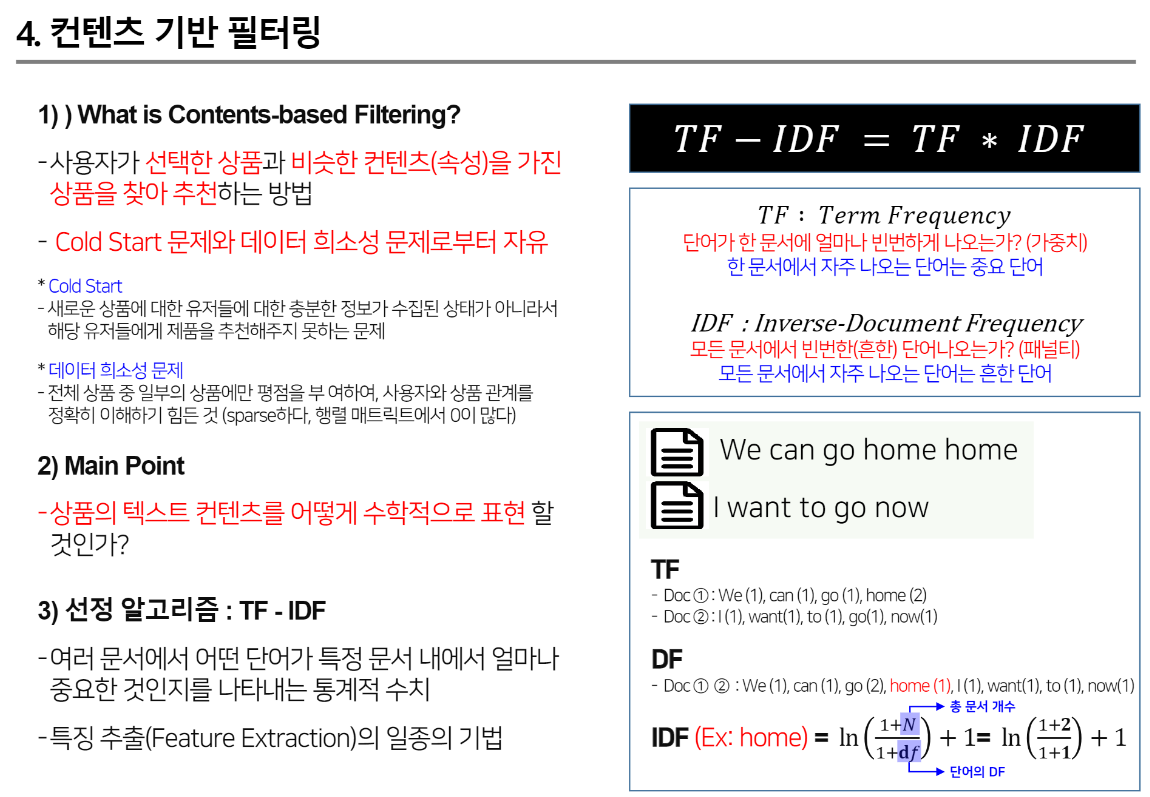

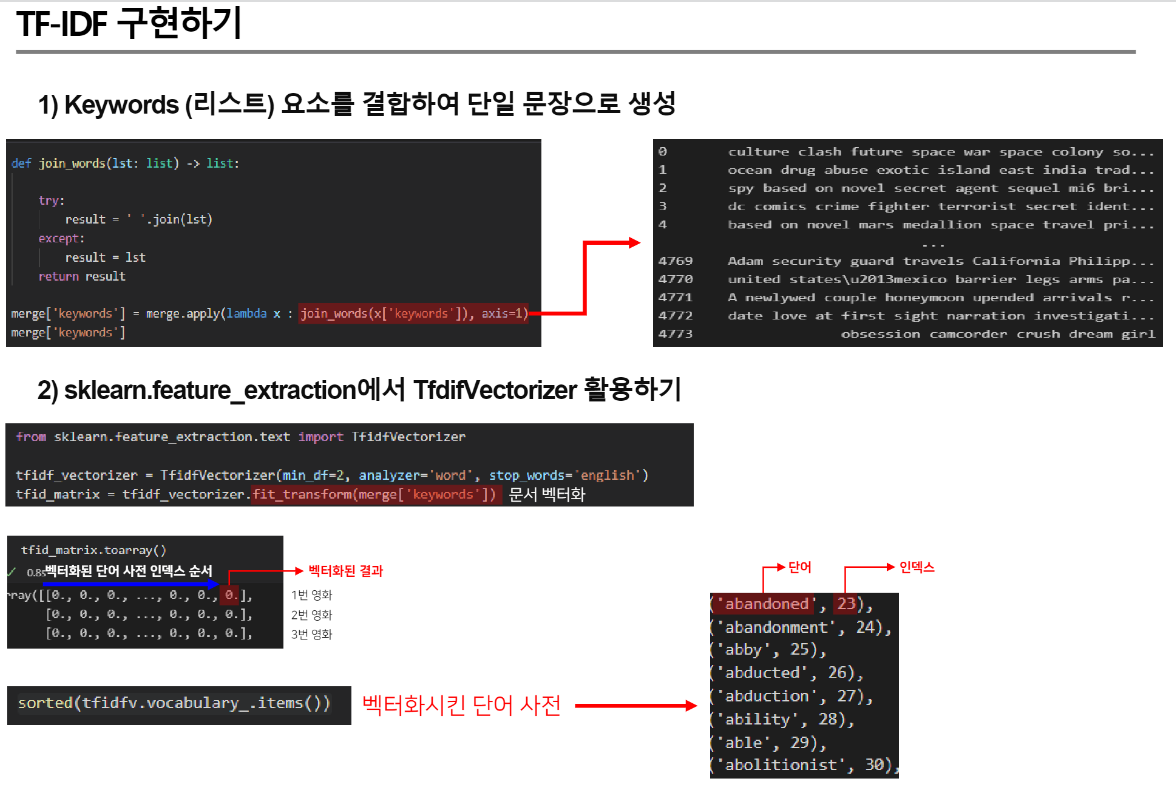

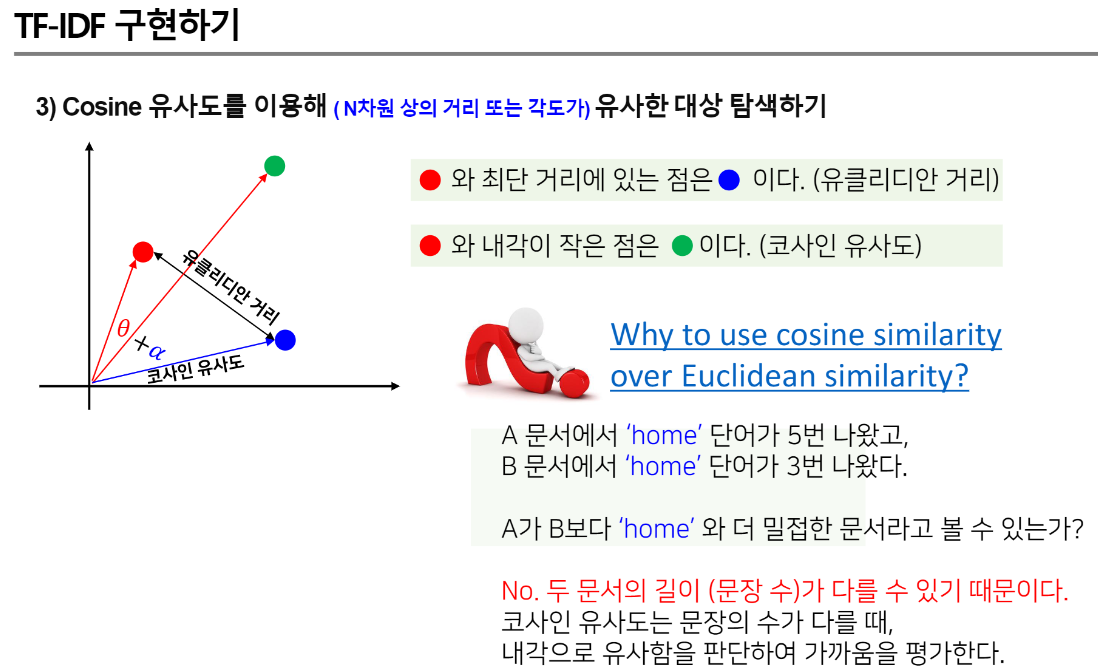

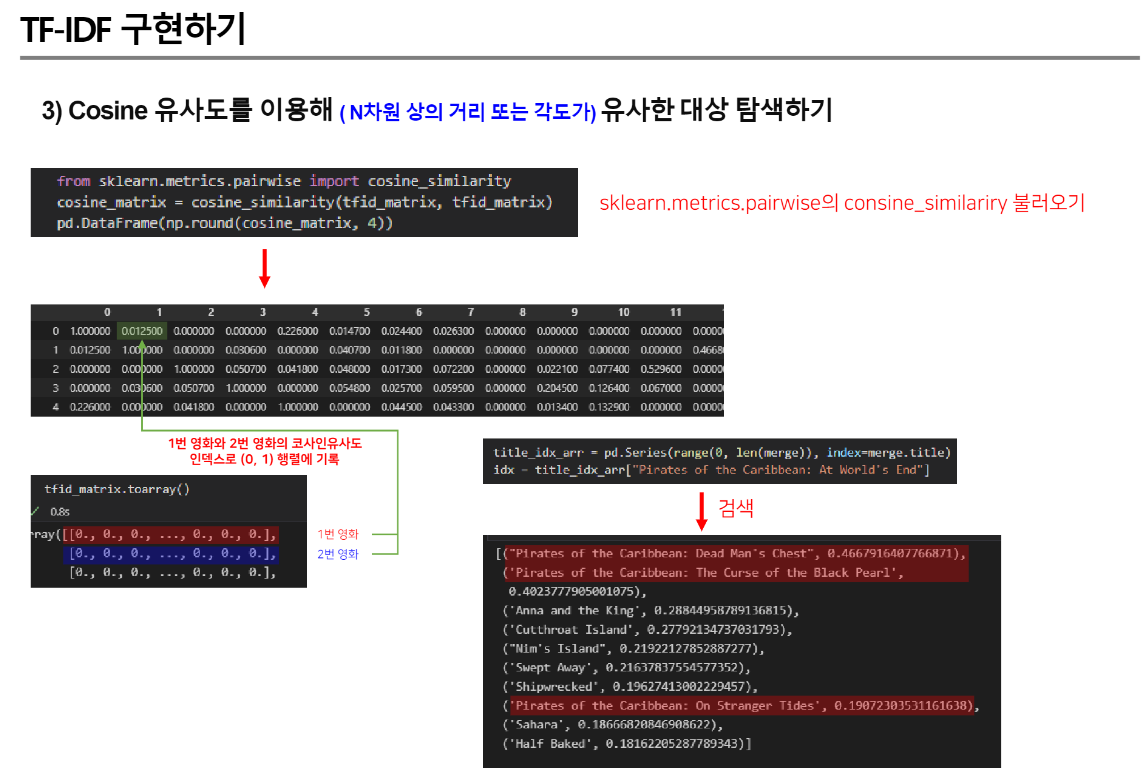

# 1. 패키지 불러오기

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import numpy as np

import os

import logging

# 로그 생성
logger = logging.getLogger()

# 로그의 출력 기준 설정
logger.setLevel(logging.INFO)

# log 출력 형식
formatter = logging.Formatter("%(message)s")

# Start defining and assigning your handlers here
handler = logging.StreamHandler()
handler.setFormatter(formatter)
logger.addHandler(handler)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 데이터 불러오기, 크기 확인

In [2]:
df = pd.read_excel('./도서목록.xlsx')
df

,ID,CATEGORY_ID,TITLE,WRITER,CONTENTS,INTRODUCTION,Unnamed: 6
0,0,자기계발,오은영의 화해,오은영,"자존감을 높이려고 너무 애쓰지 마세요. 살면서 겪을 수밖에 없는 상처나 갈등, 위기...","어린 시절 받은 상처에 대한 나의 감정을 인정하고, 또 다양한 욕망을 가진 존재가 ...",NaN
1,0,자기계발,데일 카네기 자기관리론,데일 카네기,우리는 누구나 성공할 수 있다. 누구나 행복해질 수 있다. 자신이 가진 역량의 단 ...,"이 책은 자기 경영에 지대한 관심을 가지고 노력하는 사람뿐만 아니라 직장에서, 비...",NaN
2,0,자기계발,기분이 태도가 되지 않게,레몬심리,다양한 감정이 올라오는 것은 자연스럽고 건강한 일이다. 그게 누군가에게 소리를 지르...,이 책은 기분을 잘 다스리지 못해 기어이 못난 태도를 보여주고 마는 사람들을 위해 ...,NaN
3,0,에세이,언어의 온도,이기주,글은 여백 위에만 남겨지는 게 아니다. 머리와 가슴에도 새겨진다. 마음 깊숙이 꽂힌...,"『언어의 온도』는 저자가 일상에서 발견한 의미 있는 말과 글, 단어의 어원과 유래,...",NaN
4,0,자기계발,신경끄기의 기술,마크 맨슨,삶에는 또 다른 진리가 숨어 있다. 바로 사람들의 웃음거리나 골칫거리가 되지 않고서...,이 책은 잡다한 것을 배제하고 더 나은 삶으로 가기 위한 5가지 가치관을 제시한다....,NaN
...,...,...,...,...,...,...,...
95,3,인문,마음의 법칙,폴커 키츠,남의 말을 잘 들어주면 그것이 곧 자신의 입장을 포기하는 것이라고 생각하는 탓에 공...,독일에서 가장 주목받는 심리학자 듀오답게 저자는 이해하기 어렵거나 낡은 이야기는 빼...,NaN
96,3,소설,빵 좋아하는 악당들의 행성,곽재식,마술사는 모든 일에서 가장 현명한 답을 추리해낼 수 있는 인물이었다. 모든 어려운 ...,"2005년 ‘환상문학웹진 거울’에 소설을 발표한 이래, 일곱 권의 소설집과 장편소설...",NaN
97,3,에세이,고맙습니다 그래서 나도 고마운 사람이고 싶습니다,원태연,나는 너랑 같이 있을 때 행복해 보였고 나는 너랑 있을 때 반짝반짝 빛이 났다. 나...,사랑과 이별에 관한 우리의 보통 이야기를 특별한 감성과 색채로 그려낸 원태연이 24...,NaN
98,3,에세이,노골적인 낭만 여행,김산환,외로울 때도 힘겨울 때도 아플 때도 많았지만 그게 인생이야 난 그저 내가 가려 했던...,"여행생활자 꿈의지도 김산환 대표의 삶과 여행, 그리고 음악이 녹아 있는 여행 에세이...",NaN


In [3]:
# 문자열 결측값 전처리
df.replace('[]', np.nan, inplace=True)

In [4]:
# 결측값 비율이 높은 컬럼 (homepage, tagline) 제거
del df["Unnamed: 6"]

In [5]:
df

,ID,CATEGORY_ID,TITLE,WRITER,CONTENTS,INTRODUCTION
0,0,자기계발,오은영의 화해,오은영,"자존감을 높이려고 너무 애쓰지 마세요. 살면서 겪을 수밖에 없는 상처나 갈등, 위기...","어린 시절 받은 상처에 대한 나의 감정을 인정하고, 또 다양한 욕망을 가진 존재가 ..."
1,0,자기계발,데일 카네기 자기관리론,데일 카네기,우리는 누구나 성공할 수 있다. 누구나 행복해질 수 있다. 자신이 가진 역량의 단 ...,"이 책은 자기 경영에 지대한 관심을 가지고 노력하는 사람뿐만 아니라 직장에서, 비..."
2,0,자기계발,기분이 태도가 되지 않게,레몬심리,다양한 감정이 올라오는 것은 자연스럽고 건강한 일이다. 그게 누군가에게 소리를 지르...,이 책은 기분을 잘 다스리지 못해 기어이 못난 태도를 보여주고 마는 사람들을 위해 ...
3,0,에세이,언어의 온도,이기주,글은 여백 위에만 남겨지는 게 아니다. 머리와 가슴에도 새겨진다. 마음 깊숙이 꽂힌...,"『언어의 온도』는 저자가 일상에서 발견한 의미 있는 말과 글, 단어의 어원과 유래,..."
4,0,자기계발,신경끄기의 기술,마크 맨슨,삶에는 또 다른 진리가 숨어 있다. 바로 사람들의 웃음거리나 골칫거리가 되지 않고서...,이 책은 잡다한 것을 배제하고 더 나은 삶으로 가기 위한 5가지 가치관을 제시한다....
...,...,...,...,...,...,...
95,3,인문,마음의 법칙,폴커 키츠,남의 말을 잘 들어주면 그것이 곧 자신의 입장을 포기하는 것이라고 생각하는 탓에 공...,독일에서 가장 주목받는 심리학자 듀오답게 저자는 이해하기 어렵거나 낡은 이야기는 빼...
96,3,소설,빵 좋아하는 악당들의 행성,곽재식,마술사는 모든 일에서 가장 현명한 답을 추리해낼 수 있는 인물이었다. 모든 어려운 ...,"2005년 ‘환상문학웹진 거울’에 소설을 발표한 이래, 일곱 권의 소설집과 장편소설..."
97,3,에세이,고맙습니다 그래서 나도 고마운 사람이고 싶습니다,원태연,나는 너랑 같이 있을 때 행복해 보였고 나는 너랑 있을 때 반짝반짝 빛이 났다. 나...,사랑과 이별에 관한 우리의 보통 이야기를 특별한 감성과 색채로 그려낸 원태연이 24...
98,3,에세이,노골적인 낭만 여행,김산환,외로울 때도 힘겨울 때도 아플 때도 많았지만 그게 인생이야 난 그저 내가 가려 했던...,"여행생활자 꿈의지도 김산환 대표의 삶과 여행, 그리고 음악이 녹아 있는 여행 에세이..."


# 3. 전처리

In [6]:
import re

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#df['CONTENTS'] = df['CONTENTS'].apply(lambda x: re.sub('[^ㄱ-ㅣ가-힣 ]',"",x) if isinstance(x, str) else x) # 특수문자 제거
df['INTRODUCTION'] = df['INTRODUCTION'].apply(lambda x: re.sub('[^ㄱ-ㅣ가-힣 ]',"",x) if isinstance(x, str) else x)

#df['CONTENTS'] = df['CONTENTS'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x) # 토큰나이징

In [8]:
df

,ID,CATEGORY_ID,TITLE,WRITER,CONTENTS,INTRODUCTION
0,0,자기계발,오은영의 화해,오은영,"자존감을 높이려고 너무 애쓰지 마세요. 살면서 겪을 수밖에 없는 상처나 갈등, 위기...",어린 시절 받은 상처에 대한 나의 감정을 인정하고 또 다양한 욕망을 가진 존재가 나...
1,0,자기계발,데일 카네기 자기관리론,데일 카네기,우리는 누구나 성공할 수 있다. 누구나 행복해질 수 있다. 자신이 가진 역량의 단 ...,이 책은 자기 경영에 지대한 관심을 가지고 노력하는 사람뿐만 아니라 직장에서 비즈...
2,0,자기계발,기분이 태도가 되지 않게,레몬심리,다양한 감정이 올라오는 것은 자연스럽고 건강한 일이다. 그게 누군가에게 소리를 지르...,이 책은 기분을 잘 다스리지 못해 기어이 못난 태도를 보여주고 마는 사람들을 위해 ...
3,0,에세이,언어의 온도,이기주,글은 여백 위에만 남겨지는 게 아니다. 머리와 가슴에도 새겨진다. 마음 깊숙이 꽂힌...,언어의 온도는 저자가 일상에서 발견한 의미 있는 말과 글 단어의 어원과 유래 그런 ...
4,0,자기계발,신경끄기의 기술,마크 맨슨,삶에는 또 다른 진리가 숨어 있다. 바로 사람들의 웃음거리나 골칫거리가 되지 않고서...,이 책은 잡다한 것을 배제하고 더 나은 삶으로 가기 위한 가지 가치관을 제시한다 내...
...,...,...,...,...,...,...
95,3,인문,마음의 법칙,폴커 키츠,남의 말을 잘 들어주면 그것이 곧 자신의 입장을 포기하는 것이라고 생각하는 탓에 공...,독일에서 가장 주목받는 심리학자 듀오답게 저자는 이해하기 어렵거나 낡은 이야기는 빼...
96,3,소설,빵 좋아하는 악당들의 행성,곽재식,마술사는 모든 일에서 가장 현명한 답을 추리해낼 수 있는 인물이었다. 모든 어려운 ...,년 환상문학웹진 거울에 소설을 발표한 이래 일곱 권의 소설집과 장편소설을 발표했으며...
97,3,에세이,고맙습니다 그래서 나도 고마운 사람이고 싶습니다,원태연,나는 너랑 같이 있을 때 행복해 보였고 나는 너랑 있을 때 반짝반짝 빛이 났다. 나...,사랑과 이별에 관한 우리의 보통 이야기를 특별한 감성과 색채로 그려낸 원태연이 년 ...
98,3,에세이,노골적인 낭만 여행,김산환,외로울 때도 힘겨울 때도 아플 때도 많았지만 그게 인생이야 난 그저 내가 가려 했던...,여행생활자 꿈의지도 김산환 대표의 삶과 여행 그리고 음악이 녹아 있는 여행 에세이 ...


In [9]:
from nltk.corpus import stopwords  

def remove_stop_words(word_tokens: list) -> list:

    if not isinstance(word_tokens, list):
        return word_tokens

    k_stopword=pd.read_csv("./korean_stopword.csv")
    k_stopword = list(k_stopword['불용어'])

    result = []

    for token in word_tokens: 
        if token not in stop_words: 
            result.append(token)
            
    return result
    
df['INTRODUCTION'] = df.apply(lambda x: remove_stop_words(x['INTRODUCTION']), axis=1)

In [32]:
#df['keywords'] = np.where(df['keywords'].isnull(), df['overview'], df['keywords']) # 결측값 대체

# 4. Contents-based Filtering

In [35]:
# def join_words(lst: list) -> list:

#     try:
#         result = ' '.join(lst)
#     except:
#         result = lst
#     return result

# df['INTRODUCTION'] = df.apply(lambda x : join_words(x['INTRODUCTION']), axis=1)
# df['INTRODUCTION']

0     어       린               시       절             ...
1             이               책       은             ...
2     이               책       은               기     ...
3     언       어       의               온       도     ...
4     이               책       은               잡     ...
                            ...                        
95    독       일       에       서               가     ...
96    년               환       상       문       학     ...
97    사       랑       과               이       별     ...
98    여       행       생       활       자             ...
99    이               책       에       는             ...
Name: INTRODUCTION, Length: 100, dtype: object

In [10]:
df1 = df[:25]
df2 = df[25:50]
df3 = df[50:75]
df4 = df[75:]
df4

,ID,CATEGORY_ID,TITLE,WRITER,CONTENTS,INTRODUCTION
75,3,자기계발,미라클모닝,할 엘로드,우리는 하루에 수십 수백 가지 일을 제대로 해낸다. 단지 몇 가지 실수 혹은 잘못을...,저자의 이력은 각별하다 교통사고로 걸을 수 없을 정도로 크게 다쳤던 그는 아침의 작...
76,3,자기계발,습관의 힘,찰스 두히그,"그는 내게 이렇게 말했다. ""내가 군대에서 배운 것 중에 가장 중요한 게 바로 습관...",습관의 원리를 이해하면 좀처럼 변하지 않는 나와 세상을 간단하고 완벽하게 바꿀 수 ...
77,3,자기계발,성공하는 사람들의 7가지 습관,스티븐 코비,우리가 이 상황을 변화시키기를 원한다면 우리 자신이 먼저 변화해야 한다는 사실을 깨...,성공학교과서 성공하는 사람들의 가지 습관 주년 기념 뉴에디션 짐 콜린스 서문 코비 ...
78,3,인문,12가지 인생의 법칙,조던 B. 피터슨,"행복은 산 정상에서 느끼는 잠깐의 만족이 아니라, 산을 오르는 길에서 느끼는 희망이다",미국과 캐나다 영국 젊은이들을 비롯해 전 세계에서 피터슨 현상을 일으키며 만 부가 ...
79,3,에세이,앞으로 좋은 일만 있을 나에게,아이얼원,변화는 당신 자신을 위한 것이어야 한다. 스스로가 좋아하는 모습의 사람이 되려고 노...,젊은 나이에 인생의 굵직한 고비들을 넘겨 본 덕분일까 그의 글은 많은 이들의 불안하...
80,3,에세이,오늘이 좋아지는 연습,성스런,이제는 달아나고 싶을 때마다 얼른 알아차리고 “다시 돌아와! 못해도 괜찮아! 숨 쉬...,어떤 상황이든 무조건 버텨주기만을 바라는 것이 아니라 몸과 마음이 잘 자랄 수 있는...
81,3,에세이,결국 행복하지 않은 날은 없었다,어느 날 오후,사람들은 행복한 순간을 더 행복하게 만드는 능력보다 불행한 순간을 더 불행하게 만들...,어느 날 오후 에세이 저자는 삶은 결코 불행하지 않다고 이야기 한다 삶 그 자체는 ...
82,3,에세이,내일은 모르겠고 하루만 열심히 살아봅니다,최현송,내게 행복이란 내가 선택한 방향 안에서 좋은 순간을 많이 만드는 것이다. 그리고 그...,자려고 누웠을 때 아무 걱정이 없고 오늘 하루 뿌듯했다고 느낀다면 그것이 바로 행복...
83,3,소설,소설 보다:봄,김병운,나는 천천히 달리다가 숨이 차면 걷는 것을 반복했다. 그러다 전력 질주를 했다. 몸...,지난 년간 꾸준히 출간된 소설 보다 시리즈는 젊은 작가들의 소설은 물론 선정위원이 ...
84,3,소설,은하환담,곽재식,"바람이 내게 전해다 주기를, 여우는 여전히 울고 있었다. 더는 꿈에 없고 현실에 존...",독자들은 한국 설화에 기반한 이야기들을 통해 우리의 땅과 역사를 넘어선 세상을 만날...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
Tfidf = TfidfVectorizer(sublinear_tf=True)
tfid_matrix = Tfidf.fit_transform(df4['INTRODUCTION'])

In [26]:
tfid_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 코사인 유사도

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfid_matrix, tfid_matrix)
pd.DataFrame(np.round(cosine_matrix, 4))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.058300,0.000000,0.024100,0.000000,0.015500,0.023100,0.000000,0.036100,0.023900,...,0.038700,0.000000,0.000000,0.024800,0.000000,0.000000,0.000000,0.020500,0.000000,0.011400
1,0.058300,1.000000,0.000000,0.008300,0.000000,0.031200,0.020700,0.012500,0.013100,0.041400,...,0.029900,0.000000,0.000000,0.027700,0.000000,0.089900,0.036900,0.022300,0.033000,0.012300
2,0.000000,0.000000,1.000000,0.034400,0.000000,0.012800,0.000000,0.000000,0.015300,0.000000,...,0.000000,0.000000,0.013300,0.019000,0.018200,0.022000,0.000000,0.014600,0.010700,0.037600
3,0.024100,0.008300,0.034400,1.000000,0.021900,0.011500,0.000000,0.043300,0.000000,0.000000,...,0.007100,0.000000,0.012000,0.014200,0.016400,0.000000,0.000000,0.008300,0.024700,0.041100
4,0.000000,0.000000,0.000000,0.021900,1.000000,0.020700,0.026200,0.000000,0.030500,0.000000,...,0.017900,0.020100,0.059300,0.000000,0.000000,0.000000,0.030900,0.042300,0.017400,0.000000
5,0.015500,0.031200,0.012800,0.011500,0.020700,1.000000,0.020600,0.000000,0.039100,0.000000,...,0.017500,0.000000,0.011300,0.043800,0.015500,0.012800,0.000000,0.000000,0.009200,0.026500
6,0.023100,0.020700,0.000000,0.000000,0.026200,0.020600,1.000000,0.017600,0.000000,0.029200,...,0.000000,0.000000,0.026800,0.016400,0.000000,0.056500,0.000000,0.036000,0.038300,0.039300
7,0.000000,0.012500,0.000000,0.043300,0.000000,0.000000,0.017600,1.000000,0.000000,0.012000,...,0.010800,0.000000,0.021300,0.016300,0.000000,0.011200,0.000000,0.000000,0.010500,0.032300
8,0.036100,0.013100,0.015300,0.000000,0.030500,0.039100,0.000000,0.000000,1.000000,0.018400,...,0.000000,0.106100,0.000000,0.000000,0.000000,0.050600,0.000000,0.013100,0.029000,0.000000
9,0.023900,0.041400,0.000000,0.000000,0.000000,0.000000,0.029200,0.012000,0.018400,1.000000,...,0.010300,0.014000,0.000000,0.011100,0.000000,0.041400,0.000000,0.029000,0.046500,0.000000


In [29]:
title_idx_arr = pd.Series(range(0, len(df4)), index=df4.TITLE)
title_idx_arr

TITLE
미라클모닝                          0
습관의 힘                          1
성공하는 사람들의 7가지 습관               2
12가지 인생의 법칙                    3
앞으로 좋은 일만 있을 나에게               4
오늘이 좋아지는 연습                    5
결국 행복하지 않은 날은 없었다              6
내일은 모르겠고 하루만 열심히 살아봅니다         7
소설 보다:봄                        8
은하환담                           9
하늘과 바람과 별과 시                  10
오늘 밤, 세계에서 이 사랑이 사라진다 해도      11
키르케                           12
여행하는 소설                       13
장미의 이름은 장미                    14
좋다고 하니까 나도 좋다                 15
참을 수 없는 존재의 가벼움               16
꾸베 씨의 행복 여행                   17
행복해지려는 관성                     18
행복해지는 연습을 해요                  19
마음의 법칙                        20
빵 좋아하는 악당들의 행성                21
고맙습니다 그래서 나도 고마운 사람이고 싶습니다    22
노골적인 낭만 여행                    23
행복의 조건                        24
dtype: int64

In [66]:
title_idx_arr.index[24]

'행복의 조건'

In [67]:
idx = title_idx_arr["행복의 조건"]
idx

24

In [57]:
for i in range(22):
    title_idx_arr.index[i]
    sim_scores = [ (title_idx_arr.index[i], similarity) for i, similarity in enumerate(title_idx_arr.index[i]) if i != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = dict(sim_scores[:4])
    print("평온 책: {}".format(title_idx_arr.index[i]),title_idx_arr[sim_scores.keys()])
    print(" ")

평온 책: 미라클모닝 TITLE
성공하는 사람들의 7가지 습관    2
미라클모닝               0
12가지 인생의 법칙         3
습관의 힘               1
dtype: int64
 
평온 책: 습관의 힘 TITLE
앞으로 좋은 일만 있을 나에게    4
성공하는 사람들의 7가지 습관    2
미라클모닝               0
습관의 힘               1
dtype: int64
 
평온 책: 성공하는 사람들의 7가지 습관 TITLE
성공하는 사람들의 7가지 습관     2
키르케                 12
소설 보다:봄              8
장미의 이름은 장미          14
dtype: int64
 
평온 책: 12가지 인생의 법칙 TITLE
하늘과 바람과 별과 시              10
12가지 인생의 법칙                3
오늘이 좋아지는 연습                5
내일은 모르겠고 하루만 열심히 살아봅니다     7
dtype: int64
 
평온 책: 앞으로 좋은 일만 있을 나에게 TITLE
앞으로 좋은 일만 있을 나에게             4
하늘과 바람과 별과 시                10
내일은 모르겠고 하루만 열심히 살아봅니다       7
오늘 밤, 세계에서 이 사랑이 사라진다 해도    11
dtype: int64
 
평온 책: 오늘이 좋아지는 연습 TITLE
결국 행복하지 않은 날은 없었다    6
앞으로 좋은 일만 있을 나에게     4
성공하는 사람들의 7가지 습관     2
미라클모닝                0
dtype: int64
 
평온 책: 결국 행복하지 않은 날은 없었다 TITLE
12가지 인생의 법칙          3
오늘이 좋아지는 연습          5
결국 행복하지 않은 날은 없었다    6
은하환담                 9
dtype: int64
 
평온 책: 내일은 모르겠고 하루만 열심히 살아봅니다 TI

In [68]:
sim_scores = [ (title_idx_arr[i], similarity) for i, similarity in enumerate(cosine_matrix[idx]) if i != idx]
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = dict(sim_scores[:4])
title_idx_arr[sim_scores.keys()]

TITLE
하늘과 바람과 별과 시         10
꾸베 씨의 행복 여행          17
12가지 인생의 법칙           3
결국 행복하지 않은 날은 없었다     6
dtype: int64

## 방법 2) 영화데이터_평점, 추천수 사용

In [ ]:
! git clone https://github.com/KONIPY/TMDB_movies.git

In [ ]:
import pandas as pd
import numpy as np
import warnings ; warnings.filterwarnings('ignore')

In [ ]:
movies = pd.read_csv('TMDB_movies/tmdb_5000_movies.csv')

In [ ]:
movies.columns

In [ ]:
movies_df = movies[['genres', 'id', 'keywords', 'popularity', 'title', 'overview','vote_count']]

In [ ]:
movies_df[:3]

In [ ]:
from ast import literal_eval # 문자열이 아니라 이거 리스트입니다- 라고 하고 싶을 때, ast 의 literal_eval 



movies_df = movies[['genres', 'id', 'keywords', 'popularity', 'title', 'overview','vote_count','vote_average']]
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:1])

In [ ]:
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1])

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10):
  title_movie = df[df['title']==title_name]

  title_index = title_movie.index.values
  similar_indexes = sorted_ind[title_index, :(top_n)]

  print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [ ]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

In [ ]:
movies_df[['title', 'vote_average','vote_count']].sort_values('vote_average', ascending = False)[:10]

In [ ]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C : ', round(C, 3), 'm : ', round(m,3) )

In [ ]:
percentile = 0.6

m = movies['vote_count'].quantile(percentile)
C = movies['vote_average'].mean()

def weighted_vote_average(record):
  v = record['vote_count']
  R = record['vote_average']

  return ((v/(v+m))*R) + ((m/(m+v))*C)

movies_df['weighted_vote'] = movies.apply(weighted_vote_average, axis =1)

In [ ]:
movies_df.columns

In [ ]:
movies_df[['title', 'vote_count', 'vote_average', 'weighted_vote']].sort_values('weighted_vote', ascending=False)[:10]

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10) :
  title_movie = df[df['title']==title_name]
  title_index = title_movie.index.values

  similar_indexes = sorted_ind[title_index, :(top_n*2)]
  similar_indexes = similar_indexes.reshape(-1)

  similar_indexes = similar_indexes[similar_indexes != title_index]

  return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average', 'weighted_vote']]